In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg

from basics import alpha

resultsfilename = "data_stats-outliers-replaced.csv"
st_ = pd.read_csv(resultsfilename)
print("Loading", len(st_), "lines of stats.")

def get_scale(metric):
    """
    Get the right scale for particular metric.
    """
    
    if metric in ["AUC", "Correct"]:
        return (0.6, 1.1)
    elif metric_ == "JoM":
        return (0, 100)
    else:
        return None

Loading 876 lines of stats.


# Comparison between the two fonts, grouped by training

--------------------------------------------------------------------------------
# For both studies together, lexical task only

Designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1093.0,0.938769,0.034,0.336


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,377.5,0.356582,0.054,0.261


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1811.0,0.799295,0.04,0.428


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,607.0,0.014566,0.182,0.435


----> the median is different



Designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,915.0,0.000039,-0.27,0.554


----> the median is different

Non-designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,1055.5,0.073854,-0.055,0.49


----> the median is the same



--------------------------------------------------------------------------------
# For study #1, lexical task only

Designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,114.0,0.194386,0.145,0.312


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,85.5,0.71642,0.105,0.263


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,258.5,0.358084,0.134,0.439


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,119.0,0.378039,0.187,0.408


----> the median is the same



Designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,229.5,0.003332,-0.256,0.551


----> the median is different

Non-designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,209.0,0.450057,0.071,0.477


----> the median is the same



--------------------------------------------------------------------------------
# For study #2, lexical task only

Designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,346.5,0.278702,-0.082,0.404


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,115.5,0.502001,0.004,0.257


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,538.5,0.244848,-0.116,0.478


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,193.0,0.016631,0.313,0.461


----> the median is different



Designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,239.0,0.004794,-0.259,0.557


----> the median is different

Non-designers : comparing JoM between the two fonts


,W-val,p-val,RBC,CLES
Wilcoxon,338.0,0.104027,-0.106,0.501


----> the median is the same





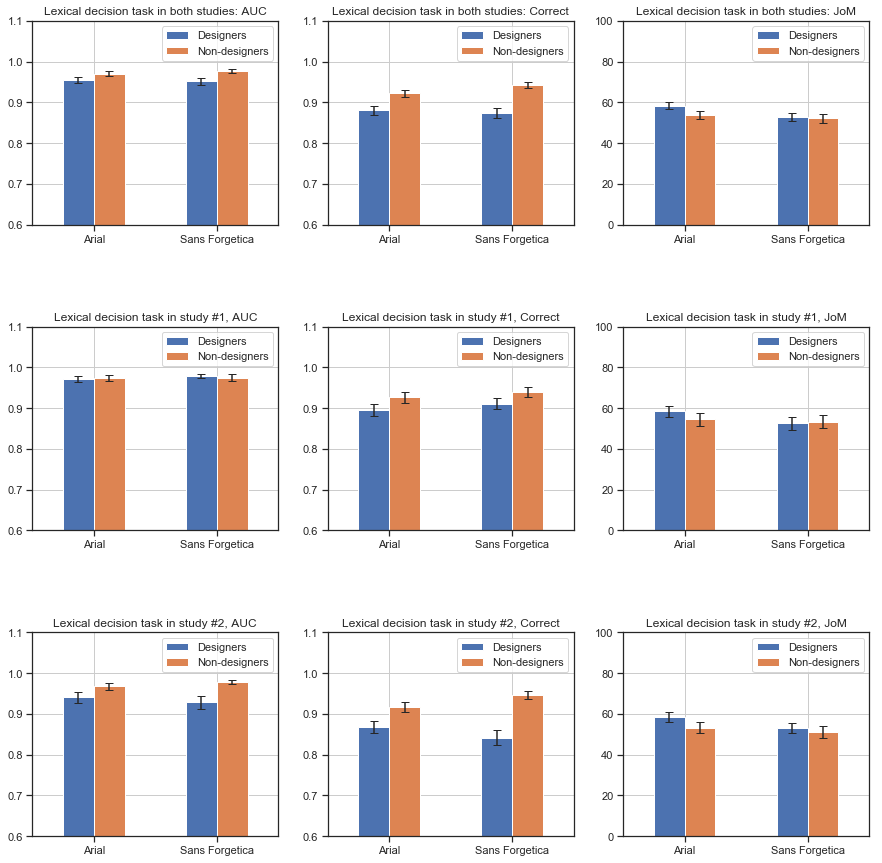

In [40]:
# Comparison of AUC, Correct, and JoM
# between the two fonts when grouped by training

# The Wilcoxon signed-rank test tests the null hypothesis
# that two related paired samples come from the same distribution.
# A continuity correction is applied by default 
# from continuous distributions with equal medians.
# The test assumes that x and y are independent.

# Legend
# RBC: The rank biserial correlation is the difference between
# the proportion of favorable evidence minus the proportion
# of unfavorable evidence (see Kerby 2014).
# CLES: The common language effect size is the probability (from 0 to 1)
# that a randomly selected observation from the first sample will be greater
# than a randomly selected observation from the second sample.

# only for the lexical task
ttype = "lexical"
metrics = ["AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, sid in enumerate(["all", 1, 2]):
    print(80 * "-")
    if sid == "all":
        st = st_[(st_["Type"] == ttype)]
        print("# For both studies together, %s task only" % ttype)
        title = "Lexical decision task in both studies: %s"
    else:
        st = st_[(st_["Type"] == ttype) & (st_["StudyID"] == sid)]
        print("# For study #%d, %s task only" % (sid, ttype))
        title = "Lexical decision task in study #%s, %%s" % sid
    print()

    for j, metric in enumerate(metrics):
        means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
        errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
        for isDesigner in [True, False]:
            designer_ = ["Non-designers", "Designers"][isDesigner]
            print(designer_, ": comparing", metric, "between the two fonts")
            x = st[(st["isDesigner"] == isDesigner) & (st["Font"] == "arial")]
            y = st[(st["isDesigner"] == isDesigner) & (st["Font"] == "sansforgetica")]
            res = pg.wilcoxon(x[metric], y[metric], tail="two-sided")
            display(res)
            if res.loc["Wilcoxon", "p-val"] > alpha:
                print("----> the median is the same")
                print()
            else:
                print("----> the median is different")
                print()
            # plot it using non-normalized metric
            metric_ = metric.replace("norm", "")
            means[designer_]["Arial"] = x[metric_].mean()
            errors[designer_]["Arial"] = x[metric_].sem()
            means[designer_]["Sans Forgetica"] = y[metric_].mean()
            errors[designer_]["Sans Forgetica"] = y[metric_].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[i][j],
                       title=title % metric_,
                       grid=True,
                       ylim=get_scale(metric_),
                       rot=0)
        print()
        print()

# Comparison between designers and non-designers, grouped by word type

Comparison between designers vs. non-designers for words only in study #2


,U-val,p-val,RBC,CLES
MWU,7260.5,0.746767,0.023,0.42


----> the median is the same

Comparison between designers vs. non-designers for non-words only in study #2


,U-val,p-val,RBC,CLES
MWU,5720.0,0.001403,0.231,0.53


----> the median is different





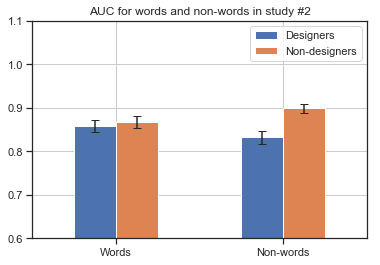

In [44]:
# Comparison of AUC
# between designers and non-designers, grouped by word type
# using MWU

# MWU tests the hypothesis that data in x and y are samples
# from continuous distributions with equal medians.
# The test assumes that x and y are independent.
# This test corrects for ties and by default uses a continuity correction.

# only for study #2
sid = 2
st = st_[st_["StudyID"] == sid]

means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Words", "Non-words"])
errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Words", "Non-words"])
for i, metric in enumerate(["AUCnorm_word", "AUCnorm_nonword"]):
    category = ["Words", "Non-words"][i]
    print("Comparison between designers vs. non-designers for", category.lower(), "only in study #2")
    x = st[st["isDesigner"] == True]
    y = st[st["isDesigner"] == False]
    res = pg.mwu(x[metric], y[metric], tail="two-sided")
    display(res)
    if res.loc["MWU", "p-val"] > alpha:
        print("----> the median is the same")
        print()
    else:
        print("----> the median is different")
        print()
    # plot it using non-normalized metric
    metric_ = metric.replace("norm", "")
    means["Designers"][category] = x[metric_].mean()
    errors["Designers"][category] = x[metric_].sem()
    means["Non-designers"][category] = y[metric_].mean()
    errors["Non-designers"][category] = y[metric_].sem()
means.plot.bar(yerr=errors,
               capsize=4,
               grid=True,
               ylim=get_scale("AUC"),
               rot=0,
               title="AUC for words and non-words in study #2")
print()
print()

# Comparison between word types, grouped by training

Comparison between words and non-words for designers , only in study #2


,W-val,p-val,RBC,CLES
Wilcoxon,1794.0,0.097583,-0.06,0.472


----> the median is the same

Comparison between words and non-words for non-designers , only in study #2


,W-val,p-val,RBC,CLES
Wilcoxon,1405.5,0.030743,0.261,0.448


----> the median is different





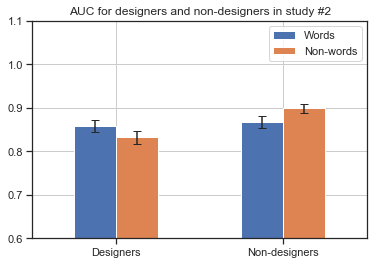

In [45]:
# Comparison of AUC
# between word types, grouped by training
# using Wilcoxon

# only for study #2
sid = 2
st = st_[st_["StudyID"] == sid]

means = pd.DataFrame(columns=["Words", "Non-words"], index=["Designers", "Non-designers"])
errors = pd.DataFrame(columns=["Words", "Non-words"], index=["Designers", "Non-designers"])
for isDesigner in [True, False]:
    designer_ = ["Non-designers", "Designers"][isDesigner]
    print("Comparison between words and non-words for", designer_.lower(), ", only in study #2")
    x = st[st["isDesigner"] == isDesigner]
    res = pg.wilcoxon(x["AUC_word"], x["AUC_nonword"], tail="two-sided")
    display(res)
    if res.loc["Wilcoxon", "p-val"] > alpha:
        print("----> the median is the same")
        print()
    else:
        print("----> the median is different")
        print()
    # plot it using non-normalized metric
    metric_ = metric.replace("norm", "")
    means["Words"][designer_] = x["AUC_word"].mean()
    errors["Words"][designer_] = x["AUC_word"].sem()
    means["Non-words"][designer_] = x["AUC_nonword"].mean()
    errors["Non-words"][designer_] = x["AUC_nonword"].sem()
means.plot.bar(yerr=errors,
               capsize=4,
               grid=True,
               ylim=get_scale("AUC"),
               rot=0,
               title="AUC for designers and non-designers in study #2")
print()
print()

# Comparison between designers and non-designers, grouped by font

Comparison of AUCnorm between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,5292.5,0.092499,0.114,0.348


----> the median is the same

Comparison of AUCnorm between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,5019.5,0.019245,0.16,0.378


----> the median is different

Comparison of Correctnorm between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,4622.5,0.003159,0.226,0.522


----> the median is different

Comparison of Correctnorm between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,3841.0,0.000003,0.357,0.583


----> the median is different

Comparison of JoM between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,6659.5,0.14112,-0.115,0.528


----> the median is the same

Comparison of JoM between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,6016.0,0.929005,-0.007,0.476


----> the median is the same



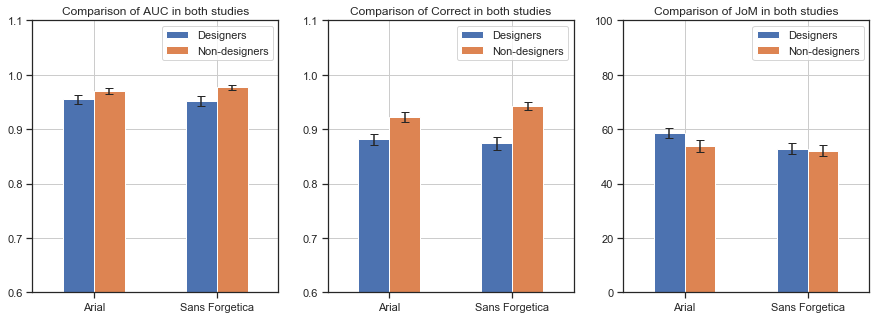

In [46]:
# Comparison of AUC, Correct, and JoM
# between designers and non-designers, grouped by font
# using MWU

st = st_[st_["Type"] == "lexical"]
metrics = ["AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, metric in enumerate(metrics):
    metric_ = metric.replace("norm", "")
    means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
    errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
    for font in ["arial", "sansforgetica"]:
        print("Comparison of", metric, "between designers and non-designers for", font)
        x = st[(st["isDesigner"] == True) & (st["Font"] == font)]
        y = st[(st["isDesigner"] == False) & (st["Font"] == font)]
        res = pg.mwu(x[metric], y[metric], tail="two-sided")
        display(res)
        if res.loc["MWU", "p-val"] > alpha:
            print("----> the median is the same")
            print()
        else:
            print("----> the median is different")
            print()
        # plot it
        font_ = font.title().replace("Sansf", "Sans F")
        means["Designers"][font_] = x[metric_].mean()
        means["Non-designers"][font_] = y[metric_].mean()
        errors["Designers"][font_] = x[metric_].sem()
        errors["Non-designers"][font_] = y[metric_].sem()
    means.plot.bar(yerr=errors,
                   capsize=4,
                   ax=axes[i],
                   grid=True,
                   ylim=get_scale(metric_),
                   rot=0,
                   title="Comparison of %s in both studies" % metric_)

# Comparison between designers and non-designers in studies #1 and #2

--------------------------------------------------------------------------------
Comparison of AUC between designers and non-designers, for both tasks
Study 1


,U-val,p-val,RBC,CLES
MWU,18126.0,0.612991,0.028,0.404


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,24511.5,0.000576,0.176,0.516


----> the median is different

Comparison of Correct between designers and non-designers, for both tasks
Study 1


,U-val,p-val,RBC,CLES
MWU,16234.5,0.025937,0.13,0.501


----> the median is different

Study 2


,U-val,p-val,RBC,CLES
MWU,21913.0,4.207985e-07,0.263,0.583


----> the median is different

Comparison of JoM between designers and non-designers, for both tasks
Study 1


,U-val,p-val,RBC,CLES
MWU,19374.0,0.512082,-0.038,0.494


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,31898.0,0.162741,-0.073,0.507


----> the median is the same




--------------------------------------------------------------------------------
Comparison of AUC between designers and non-designers, lexical task only
Study 1


,U-val,p-val,RBC,CLES
MWU,4481.0,0.572597,0.039,0.282


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,5764.0,0.000687,0.225,0.432


----> the median is different

Comparison of Correct between designers and non-designers, lexical task only
Study 1


,U-val,p-val,RBC,CLES
MWU,3725.0,0.012782,0.201,0.493


----> the median is different

Study 2


,U-val,p-val,RBC,CLES
MWU,4629.5,2.020186e-07,0.377,0.606


----> the median is different

Comparison of JoM between designers and non-designers, lexical task only
Study 1


,U-val,p-val,RBC,CLES
MWU,4843.5,0.644073,-0.038,0.494


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,7974.5,0.324447,-0.073,0.507


----> the median is the same




--------------------------------------------------------------------------------
Comparison of AUC between designers and non-designers, recognition task only
Study 1


,U-val,p-val,RBC,CLES
MWU,4435.5,0.555039,0.049,0.481


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,6231.5,0.028769,0.162,0.558


----> the median is different

Comparison of Correct between designers and non-designers, recognition task only
Study 1


,U-val,p-val,RBC,CLES
MWU,4294.5,0.333529,0.079,0.449


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,6305.0,0.037604,0.152,0.5


----> the median is different

Comparison of JoM between designers and non-designers, recognition task only
Study 1


,U-val,p-val,RBC,CLES
MWU,4843.5,0.644073,-0.038,0.494


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,7974.5,0.324447,-0.073,0.507


----> the median is the same






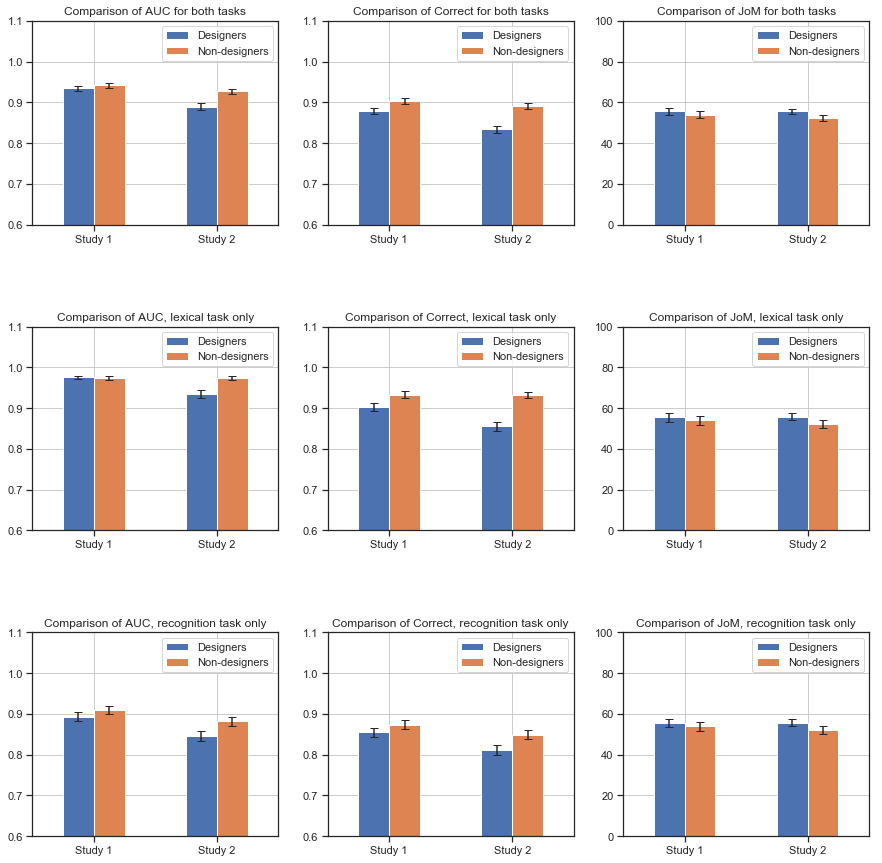

In [53]:
# Comparison between designers and non-designers in studies #1 and #2
# using MWU

metrics = ["AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, ttype in enumerate(["both", "lexical", "recognition"]):
    print(80 * "-")
    for j, metric in enumerate(metrics):
        metric_ = metric.replace("norm", "")
        if ttype == "both":
            print("Comparison of %s between designers and non-designers, for both tasks" % metric_)
            title = "Comparison of %s for both tasks" % metric_
            st = st_
        else:
            print("Comparison of %s between designers and non-designers, %s task only" % (metric_, ttype))
            title = "Comparison of %s, %s task only" % (metric_, ttype)
            st = st_[st_["Type"] == ttype]
        means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Study 1", "Study 2"])
        errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Study 1", "Study 2"])
        for sid in [1, 2]:
            print("Study", sid)
            x = st[(st["isDesigner"] == True) & (st["StudyID"] == sid)]
            y = st[(st["isDesigner"] == False) & (st["StudyID"] == sid)]
            res = pg.mwu(x[metric], y[metric], tail="two-sided")
            display(res)
            if res.loc["MWU", "p-val"] > alpha:
                print("----> the median is the same")
                print()
            else:
                print("----> the median is different")
                print()
            # plot it
            study_ = "Study %s" % sid
            means["Designers"][study_] = x[metric_].mean()
            means["Non-designers"][study_] = y[metric_].mean()
            errors["Designers"][study_] = x[metric_].sem()
            errors["Non-designers"][study_] = y[metric_].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[i][j],
                       grid=True,
                       ylim=get_scale(metric_),
                       rot=0,
                       title=title)
    print()
    print()
    print()

# Comparison between designers and non-designers in studies #1 and #2 (first part only)

--------------------------------------------------------------------------------
Comparison of AUC between designers and non-designers, for both tasks, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,4523.5,0.704031,0.03,0.397


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,6201.5,0.022586,0.166,0.522


----> the median is different

Comparison of Correct between designers and non-designers, for both tasks, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,3967.0,0.070685,0.149,0.514


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,5668.0,0.001278,0.238,0.576


----> the median is different

Comparison of JoM between designers and non-designers, for both tasks, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,4816.0,0.696174,-0.033,0.496


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,7974.5,0.324447,-0.073,0.507


----> the median is the same




--------------------------------------------------------------------------------
Comparison of AUC between designers and non-designers, lexical task only, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,1053.0,0.32397,0.097,0.307


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,1437.5,0.016062,0.227,0.436


----> the median is different

Comparison of Correct between designers and non-designers, lexical task only, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,911.5,0.059754,0.218,0.517


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,1205.5,0.000652,0.351,0.594


----> the median is different

Comparison of JoM between designers and non-designers, lexical task only, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,1204.0,0.785103,-0.033,0.496


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,1883.0,0.901784,-0.013,0.483


----> the median is the same




--------------------------------------------------------------------------------
Comparison of AUC between designers and non-designers, recognition task only, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,1148.5,0.900903,0.015,0.455


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,1571.5,0.141701,0.154,0.561


----> the median is the same

Comparison of Correct between designers and non-designers, recognition task only, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,1070.5,0.481388,0.082,0.447


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,1610.0,0.197859,0.134,0.497


----> the median is the same

Comparison of JoM between designers and non-designers, recognition task only, first part only
Study 1


,U-val,p-val,RBC,CLES
MWU,1204.0,0.785103,-0.033,0.496


----> the median is the same

Study 2


,U-val,p-val,RBC,CLES
MWU,2126.5,0.167282,-0.144,0.537


----> the median is the same






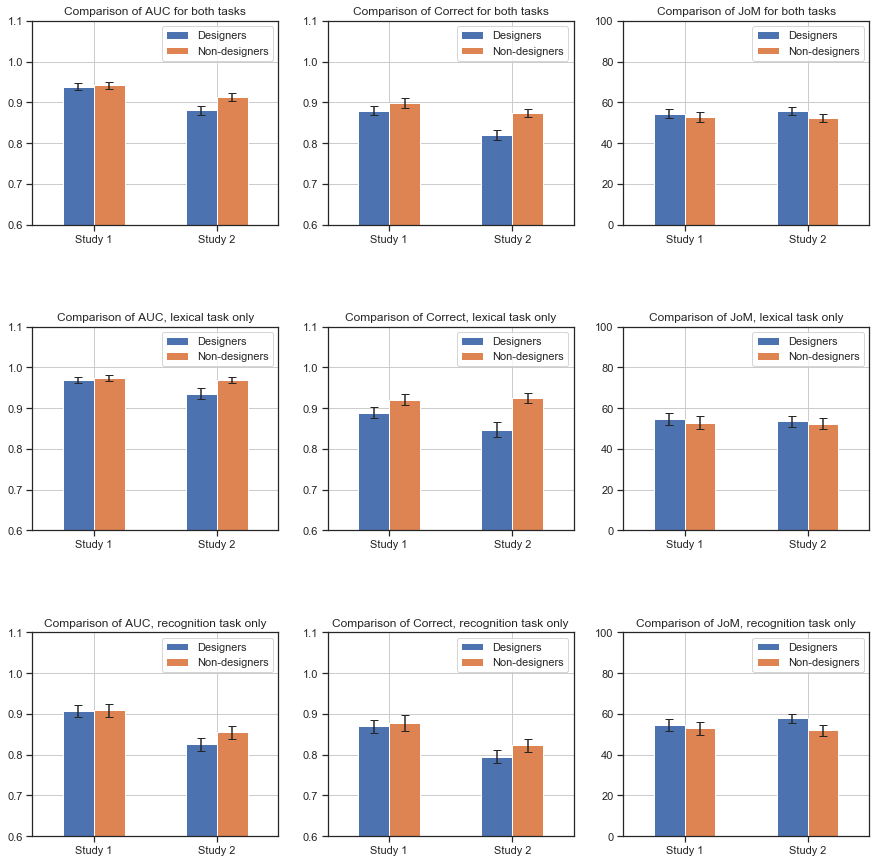

In [54]:
# Comparison between designers and non-designers in studies #1 and #2 (first part only)
# using MWU

metrics = ["AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, ttype in enumerate(["both", "lexical", "recognition"]):
    print(80 * "-")
    for j, metric in enumerate(metrics):
        metric_ = metric.replace("norm", "")
        if ttype == "both":
            print("Comparison of %s between designers and non-designers, for both tasks, first part only" % metric_)
            title = "Comparison of %s for both tasks" % metric_
            st = st_[st_["TestID"] == 1]
        else:
            print("Comparison of %s between designers and non-designers, %s task only, first part only" % (metric_, ttype))
            title = "Comparison of %s, %s task only" % (metric_, ttype)
            st = st_[(st_["TestID"] == 1) & (st_["Type"] == ttype)]
        means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Study 1", "Study 2"])
        errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Study 1", "Study 2"])
        for sid in [1, 2]:
            print("Study", sid)
            x = st[(st["isDesigner"] == True) & (st["StudyID"] == sid)]
            y = st[(st["isDesigner"] == False) & (st["StudyID"] == sid)]
            res = pg.mwu(x[metric], y[metric], tail="two-sided")
            display(res)
            if res.loc["MWU", "p-val"] > alpha:
                print("----> the median is the same")
                print()
            else:
                print("----> the median is different")
                print()
            # plot it
            study_ = "Study %s" % sid
            means["Designers"][study_] = x[metric_].mean()
            means["Non-designers"][study_] = y[metric_].mean()
            errors["Designers"][study_] = x[metric_].sem()
            errors["Non-designers"][study_] = y[metric_].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[i][j],
                       grid=True,
                       ylim=get_scale(metric_),
                       rot=0,
                       title=title)
    print()
    print()
    print()